In [91]:
#Essentials
import pandas as pd
import numpy as np

#Plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#Models
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
import xgboost
import lightgbm
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# from mlxtend.regressor import StackingCVRegressor
from mlxtend.classifier import StackingCVClassifier

#Misc
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#ignore warnings
import warnings
warnings.filterwarnings("ignore")


# path='C:\\Users\\sunsharp\\Desktop\\kaggle\\Titanic\\'
path=r'/Users/ranmo/Desktop/kaggle/Titanic/'


In [11]:
#===========
# 函数定义
#===========

#1、训练模型
def model_eval(model,X_train,y_train):
    acc=[]
    kf=model_selection.KFold(10,random_state=10)
    for train,test in kf.split(X_train):
        X_train1 = X_train.iloc[train]
        y_train1 = y_train.iloc[train]
        X_test1 = X_train.iloc[test]
        y_test1 = y_train.iloc[test]

        y_pred1=model.fit(X_train1,y_train1).predict(X_test1)
        acc.append(metrics.accuracy_score(y_pred1,y_test1))  #准确性作为指标
    print(acc)
    print('acc_mean:',np.mean(acc))
    print('acc_std:',np.std(acc))
    print('mean-1.5*std:',np.mean(acc)-1.5*(np.std(acc)))            #可以调整，这里是发现测试集和实际成绩的差异为1.5个标准差
    print()
    print()
    return ('mean-1.5*std:',np.mean(acc)-1.5*(np.std(acc)))

#2、模型预测
def model_predict(model,X_test,outpath):
    Survived=model.predict(X_test)
    df_pre=pd.DataFrame({'PassengerId':X_test.index,'Survived':Survived.astype('int')}).set_index('PassengerId')  #转化为整数
    df_pre.to_csv('%stest_pred.csv'%outpath)

0 exploration

In [3]:
#看一下特征情况
df_train=pd.read_csv('%sdata/train.csv'%path)
df_train=df_train.set_index('PassengerId')
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
#看一下非数值类的数据，需要进行独热编码
df_train.dtypes[df_train.dtypes==object]
df_train.Ticket.value_counts()
df_train.Name.value_counts()
df_train.Cabin.value_counts()

#sex和embark肯定要独热编码，ticket、name、cabin也直接去掉？因为分类树木太多。。

B96 B98            4
G6                 4
C23 C25 C27        4
D                  3
F33                3
C22 C26            3
F2                 3
E101               3
D35                2
F4                 2
C52                2
D17                2
D36                2
E67                2
C78                2
B57 B59 B63 B66    2
C65                2
B28                2
F G73              2
E8                 2
E33                2
C124               2
B58 B60            2
E44                2
B22                2
B49                2
B77                2
C92                2
C126               2
C123               2
                  ..
A24                1
C99                1
B73                1
F E69              1
B71                1
D11                1
E68                1
B102               1
A36                1
D15                1
C91                1
B19                1
B80                1
E12                1
D30                1
D50                1
C103         

In [7]:
#=============
#联合处理训练集和测试集
#=============

df_test=pd.read_csv('%sdata//test.csv'%path)
df_test=df_test.set_index('PassengerId')
temp=pd.concat([df_train,df_test],axis=0).drop(['Cabin','Name','Ticket'],axis=1)
temp=pd.get_dummies(temp)

#缺失值处理
for i in temp.columns:
    if temp[i].value_counts().sum()!=len(temp):
        print(i)
#age 用train的mean填充
temp['Age'].fillna(df_train['Age'].mean(),inplace=True)
#fare 用train的mean填充
temp['Fare'].fillna(df_train['Fare'].mean(),inplace=True)


#分离训练集和测试集
df_train_modified=temp.loc[df_train.index.to_list()]
df_test_modified=temp.loc[df_test.index.to_list()]

X_train=df_train_modified.drop('Survived',axis=1)
y_train=df_train_modified['Survived']
X_test=df_test_modified.drop('Survived',axis=1)

Age
Fare
Survived


In [22]:
#=============
#跑一下基本模型
#=============

clf=xgboost.XGBClassifier(objective='binary:logistic',n_jobs=-1,eval_metric='error',random_state=10)
model_eval(clf,X_train,y_train)

#模型预测
outpath='%s//clf//0103//base//'%path
clf.fit(X_train,y_train)
model_predict(clf,X_test,outpath)  

#成绩0.77033

[0.7888888888888889, 0.8089887640449438, 0.7752808988764045, 0.8539325842696629, 0.8426966292134831, 0.8202247191011236, 0.8202247191011236, 0.7752808988764045, 0.8651685393258427, 0.8426966292134831]
0.819338327091136




一、EDA

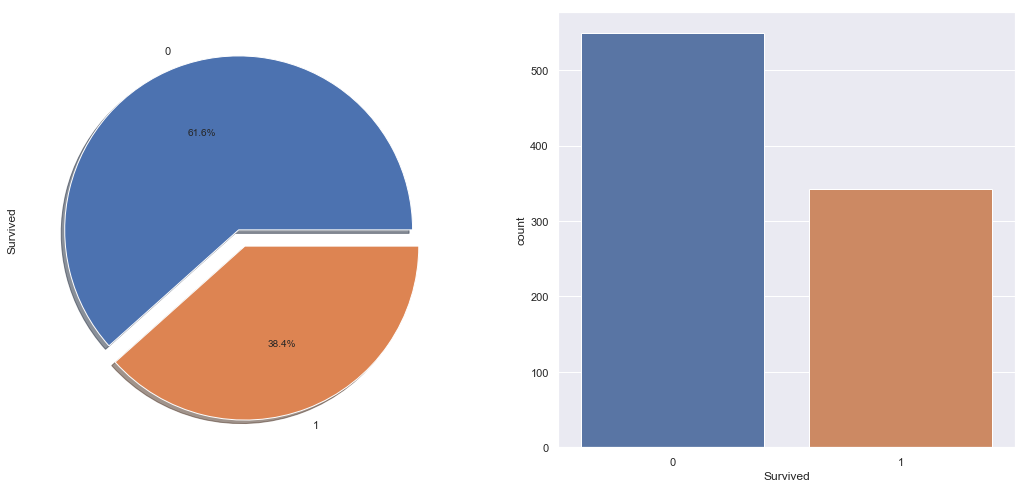

In [4]:
f,ax=plt.subplots(1,2,figsize=(18,8))  #分图要在分的时候就设置图片大小
df_train.Survived.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot(x='Survived',data=df_train,ax=ax[1])

- 目标变量比例是有一定偏差的，所以需要针对性别、舱等做一下深入的EDA

In [37]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Pclass:Survived vs Dead')

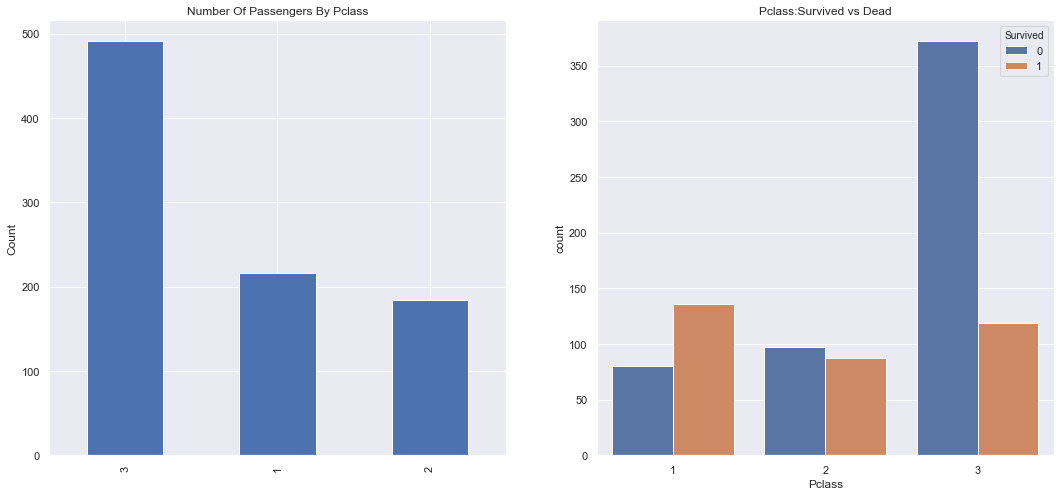

In [65]:
##等级
df_train[['Pclass','Survived']].pivot_table(aggfunc=['count','sum'],index='Pclass')


f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

- 阶层等级是一个重要因素，1和2的区别不大，但是阶层3的存活率是较低的(1代表最高阶层，3代表低阶层，下述中低阶层指3)

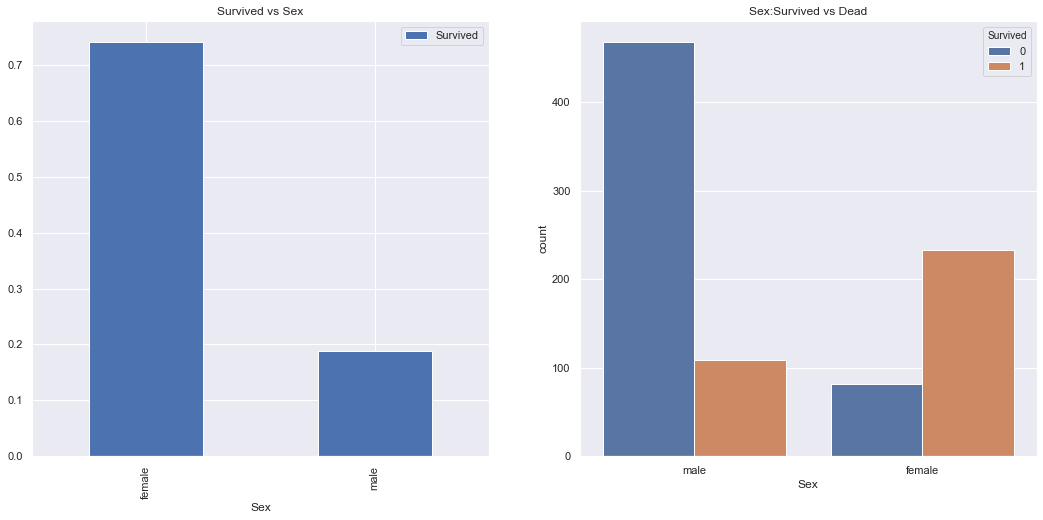

In [36]:
##性别
df_train.groupby(['Sex','Survived'])['Survived'].count()
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 显然，性别是一个很重要的因素。女性的存活概率会更高

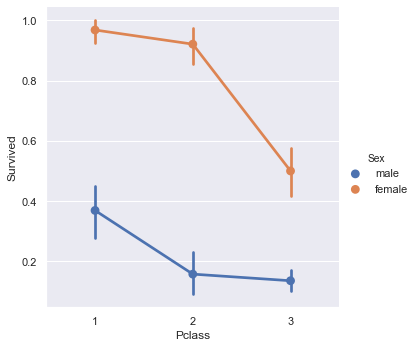

In [66]:
#结合等级看一下

sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
# 上层阶层的女性更容易存活，显而易见

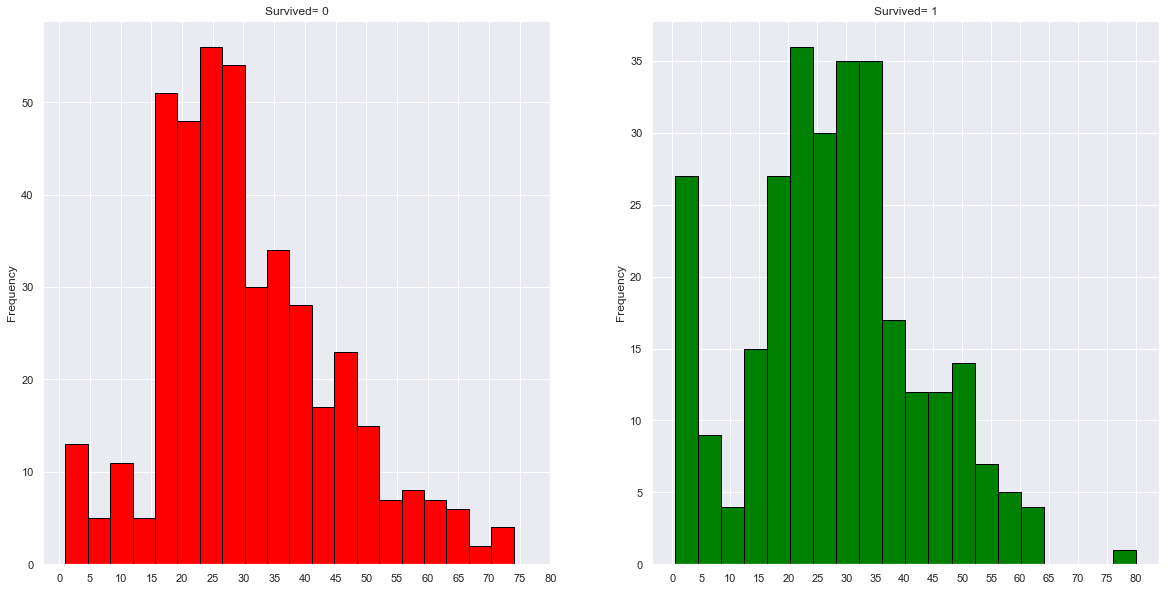

In [14]:
#年龄
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
#其实这里仍然应该画提琴图，看比例的

- 儿童获救比例更高（妇幼优先政策）；
- 80岁老人获救了，但量很少，可能是极端情况；
- 20~40之间是人数最多的年龄段，同时也是死亡人数最多的年龄段。

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Sex and Age vs Survived')

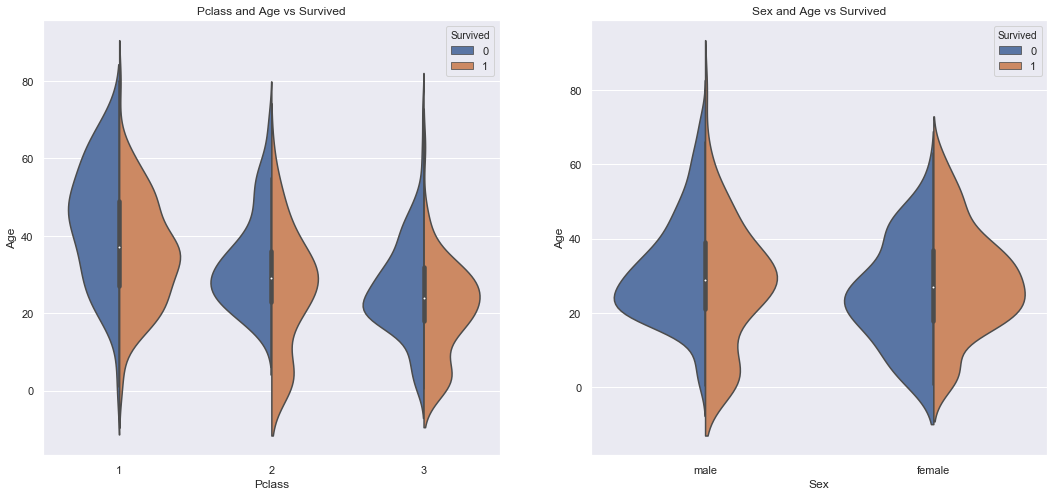

In [71]:
#年龄
#结合阶层和性别看一下
print(df_train.Age.describe())

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot("Sex","Age", hue="Survived", data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

- 低阶层的儿童会更多，年龄会偏小；同时整体来看年龄小的（儿童）存活率都会更高；
- 高阶层年轻人的存活率更高，老人存活率更低，低阶层则相差无几；
- 女性的生存机会随着年龄增长会增加，但这本身可能只是因为女性的生存机会本来就大，相比男性的话随着年龄增加生存机会减少，但是不同性别的生存机会在年龄上 没有表现出很明显的变化；

In [21]:
# Embarked登机口

pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

- Q港口可能是最穷的，因为高阶层少；
- C港口可能也比S港口更好，因为高阶层比例会更多，而S港口是认罪的；

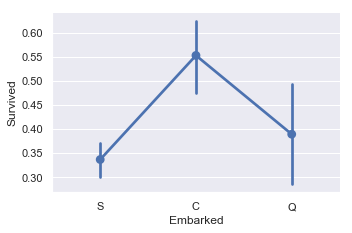

In [24]:
# Embarked港口
sns.factorplot('Embarked','Survived',data=df_train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- C港口存活率高是因为港口最好，高阶层多；
- Q港口尽管可能是最穷的，但是因为人数少，妇女占比略高，所以存活率由于S港口。

In [25]:
#SibSip 平级亲属
pd.crosstab([df_train.SibSp],df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


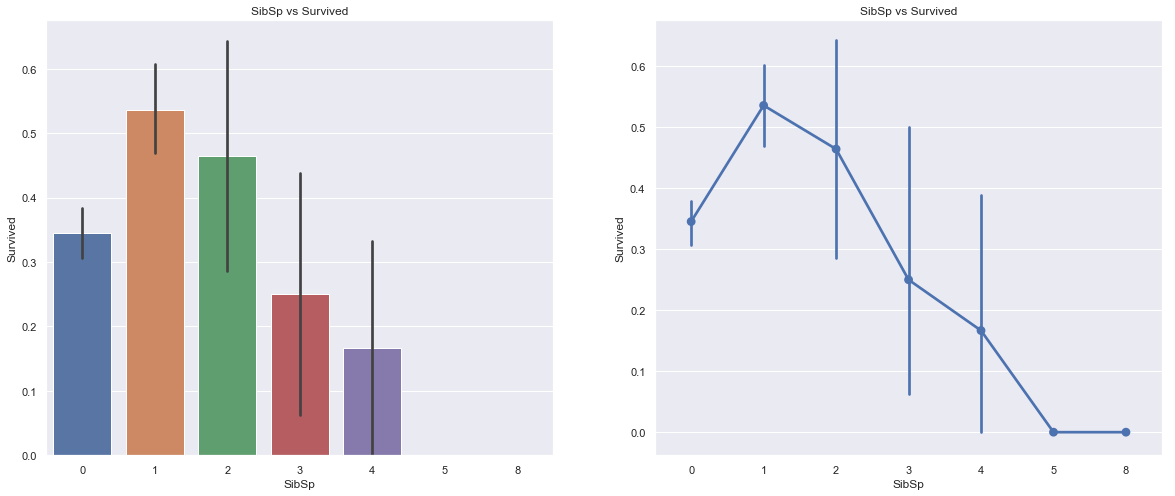

In [26]:
#SibSip 平级亲属
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=df_train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=df_train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [28]:
#SibSip 平级亲属
pd.crosstab(df_train.SibSp,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 高阶层不会有很多个平级亲属，最多三个；
- 平级亲属多一些，存活率会提高，但是如果过多，则存活率下降，可能是需要救助得人太多而导致错过了救助机会，但也有可能是因为阶层分布差异造成，因为低阶层容易携带更多平级亲属

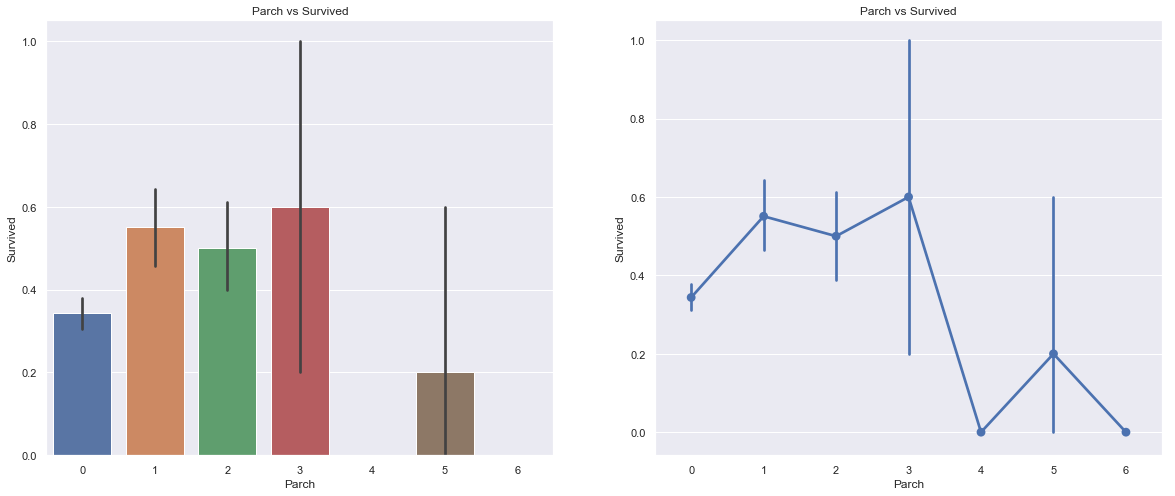

In [29]:
#Parch 直系亲属
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=df_train,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=df_train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [30]:
#Parch 直系亲属
pd.crosstab(df_train.Parch,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- 和平级亲属类似，家人过多肯定是不容易活下来，但也有可能是因为低阶层造成的；
- 但如果有少量的家人（<3），存活率会提高，如果过多，存活率下降。

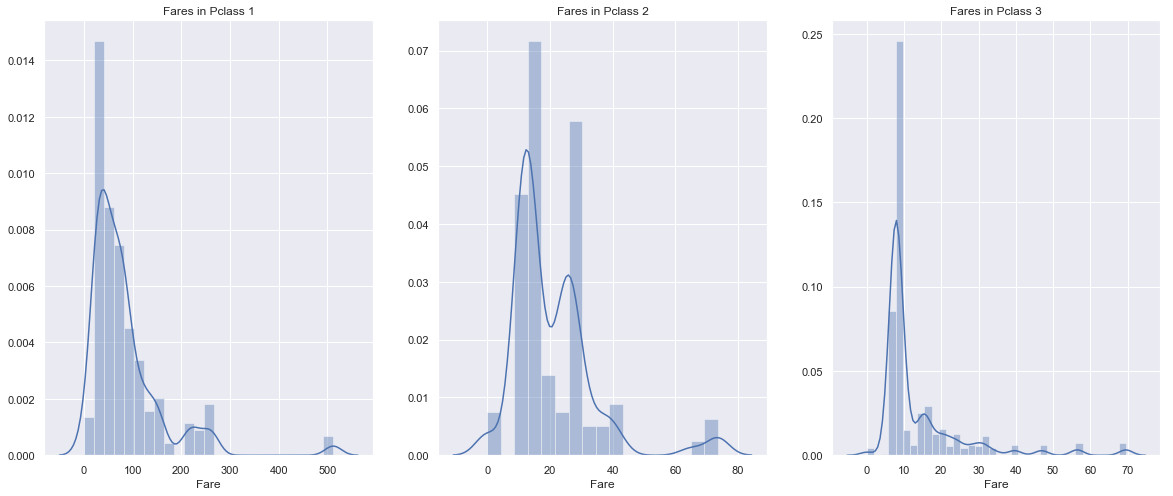

In [33]:
#票价

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_train[df_train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df_train[df_train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')


票价和阶层是有很直接的关系的

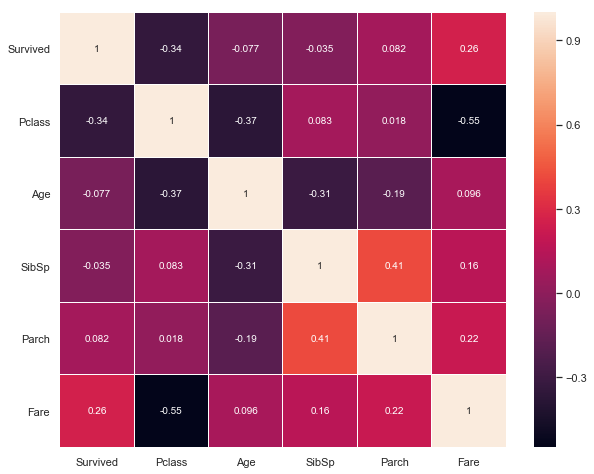

In [35]:
#相关性

sns.heatmap(df_train.corr(),annot=True,linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)

- 相关性上没有明显相关的，最为相关的就是SibSp和Parch，即部分乘客在携带家人也会携带伴侣一起旅游。

**EDA总结**：
- 女性和儿童存活率会更高；
- 高阶层存活率会更高；
- 有1-2个兄弟姐妹或1-3个父母孩子，存活率会更高，但超过这个数字存活率就会下降。

二、特征工程

In [10]:
# 合并train和test，但同时要防止leak

df_train=pd.read_csv('%sdata//train.csv'%path).set_index('PassengerId')
df_test=pd.read_csv('%sdata//test.csv'%path).set_index('PassengerId')
df_feature=pd.concat([df_train,df_test],axis=0)
df_feature

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742


In [15]:
#提取name中的关键性别字，并进行性别转化

main_title_map = {'Lady': 'Mrs', 'Mme': 'Mrs', 'Dona': 'Mrs', 'the Countess': 'Mrs',
         'Ms': 'Miss', 'Mlle': 'Miss',
         'Sir': 'Mr', 'Major': 'Mr', 'Capt': 'Mr', 'Jonkheer': 'Mr', 'Don': 'Mr', 'Col': 'Mr', 'Rev': 'Mr', 'Dr': 'Mr'}

def get_title(full_name):
    return full_name.split(',')[1].split('.')[0].strip()

def set_title_mr(data):
    titles = data['Name'].apply(get_title).replace(main_title_map)
    data['Title_Mr'] = titles.apply(lambda title: 1 if title == 'Mr' else 0)
    
set_title_mr(df_feature)   #为mr则为1，否则为0


male_map = {'male': 1, 'female': 0}
df_feature['Male']=df_feature['Sex'].map(male_map) #为male则为1，否则为0

df_feature
#所以有的虽然是male，但不是mr，主要是因为是孩子，这里也是做了一个简单的保留（妇幼优先政策）

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title_Mr,Male
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,0
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1,1
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,1,1
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,1,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909,0,1
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,0,0


In [16]:
# Placss_3
class3_map = {1: 0, 2: 0, 3: 1}
df_feature['Pclass_3'] = df_feature['Pclass'].map(class3_map)

df_feature
#三个阶层只分为两类


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title_Mr,Male,Pclass_3
PassengerId,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1,1,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,0,0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,0,1
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,0,0
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1,1,1
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,1,1,1
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,1,1,0
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909,0,1,1
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,0,0,1


In [17]:
# 组队的存活率，eda中发现有家人或伴侣的，会影响其存活率

# 第一步、family name
def extract_lastname(full_name):
    return full_name.split(',')[0]

df_feature['Last name'] = df_feature['Name'].apply(extract_lastname)


#第二步，组队的存活率，eda中发现有家人或伴侣的，会影响其存活率。所以利用LAST NAME 或者是票号来判别是否是组队，优先用票号来判定，比LAST NAME要更可行
print(df_feature['Last name'].value_counts())
print(df_feature['Ticket'].value_counts())

def prepare_family_ticket_frequencies_actual(data, is_train, train, last_names_survival, tickets_survival):
    data['Known family/ticket survived %'] = np.NaN

    mean_train_survive = train['Survived'].mean()

    
    for i in data.index:
        did_survive = 1 if (is_train == 1) and (train.loc[i, 'Survived'] == 1) else 0
        last_name = data.loc[i, 'Last name']
        ticket = data.loc[i, 'Ticket']
        family_survived = np.NaN
        ticket_survived = np.NaN

        if last_name in last_names_survival:
            last_name_count, last_name_sum = last_names_survival[last_name]
            if last_name_count > is_train:
                family_survived = (last_name_sum - did_survive) / (last_name_count - is_train)

        if ticket in tickets_survival:
            ticket_count, ticket_sum = tickets_survival[ticket]
            if ticket_count > is_train:
                ticket_survived = (ticket_sum - did_survive) / (ticket_count - is_train)
        if np.isnan(family_survived) == False:
            if np.isnan(ticket_survived) == False:
                data.loc[i, 'Known family/ticket survived %'] = (family_survived + ticket_survived) / 2
            else:
                data.loc[i, 'Known family/ticket survived %'] = family_survived
        elif np.isnan(ticket_survived) == False:
            data.loc[i, 'Known family/ticket survived %'] = ticket_survived
        else:
            data.loc[i, 'Known family/ticket survived %'] = mean_train_survive
            
    
def prepare_family_ticket_frequencies(train, test):
    last_names_survival = {}
    for last_name in (set(train['Last name'].unique()) | set(test['Last name'].unique())):
        last_name_survived = train[train['Last name'] == last_name]['Survived']
        if last_name_survived.shape[0] > 0:
            last_names_survival[last_name] = (last_name_survived.count(), last_name_survived.sum())

    tickets_survival = {}
    for ticket in (set(train['Ticket'].unique()) | set(test['Ticket'].unique())):
        ticket_survived = train[train['Ticket'] == ticket]['Survived']
        if ticket_survived.shape[0] > 0:
            tickets_survival[ticket] = (ticket_survived.count(), ticket_survived.sum())

    prepare_family_ticket_frequencies_actual(train, True, train, last_names_survival, tickets_survival)
    prepare_family_ticket_frequencies_actual(test, False, train, last_names_survival, tickets_survival)
    
df_train1=df_feature.loc[df_train.index]
df_test1=df_feature.loc[df_test.index]
prepare_family_ticket_frequencies(df_train1,df_test1)
df_feature=pd.concat([df_train1,df_test1],axis=0)

df_feature

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title_Mr,Male,Pclass_3,Last name
PassengerId,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1,1,1,Braund
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,0,0,Cumings
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,0,1,Heikkinen
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,0,0,Futrelle
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1,1,1,Allen
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,1,1,1,Moran
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,1,1,0,McCarthy
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909,0,1,1,Palsson
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,0,0,1,Johnson


In [54]:
#保留有效特征

feat_to_train_on = ['Title_Mr', 'Male', 'Pclass_3', 'Known family/ticket survived %']   #如果要进一步的话可以把港口一起考虑进去，但实际港口反映的是阶层差异
X_train=df_feature[feat_to_train_on].loc[df_train.index]
y_train=df_feature['Survived'].loc[df_train.index]
X_test=df_feature[feat_to_train_on].loc[df_test.index]

#里面的年龄特征其实不是很重要，主要是孩童的存活率比较高，处理在了Title_Mr里边。

In [62]:
#检查是否有缺失值
print(X_train.isnull().any())
print('---')
print(y_train.isnull().any())
print('---')
print(X_test.isnull().any())

Title_Mr                          False
Male                              False
Pclass_3                          False
Known family/ticket survived %    False
dtype: bool
---
False
---
Title_Mr                          False
Male                              False
Pclass_3                          False
Known family/ticket survived %    False
dtype: bool


In [63]:
X_train.to_csv('%sdata//X_train.csv'%path)
y_train.to_csv('%sdata//y_train.csv'%path)
X_test.to_csv('%sdata//X_test.csv'%path)

In [ ]:
三、训练模型

In [12]:
X_train=pd.read_csv('%sdata//X_train.csv'%path).set_index('PassengerId')
y_train=pd.read_csv('%sdata//y_train.csv'%path).set_index('PassengerId')
X_test=pd.read_csv('%sdata//X_test.csv'%path).set_index('PassengerId')

In [67]:
#=============
#跑一下基本模型
#=============

clf=xgboost.XGBClassifier(objective='binary:logistic',n_jobs=-1,eval_metric='error',random_state=10)
model_eval(clf,X_train,y_train)

#模型预测
outpath='%s//clf//0108//base//'%path
clf.fit(X_train,y_train)
model_predict(clf,X_test,outpath)  

#成绩0.81339 

[0.8666666666666667, 0.8764044943820225, 0.8314606741573034, 0.8539325842696629, 0.8426966292134831, 0.8426966292134831, 0.8202247191011236, 0.8089887640449438, 0.8876404494382022, 0.8764044943820225]
acc_mean: 0.8507116104868915
acc_std: 0.024735098670869045
mean-1.5*std: 0.8136089624805879




In [14]:
# 函数定义：
def find_cv(model,X_train,y_train,param_test):
    kflod = model_selection.KFold(10,random_state=10)
    model_cv=model_selection.GridSearchCV(model,param_test,cv=kflod,n_jobs=-1,scoring='accuracy')  
    #理论上是应该会保持和model_eval中的k折结果一样才对，但又不一样，不知道问题在哪里。。。
    model_cv.fit(X_train,y_train)

    print("mean-1.5*std:",model_cv.cv_results_['mean_test_score']-1.5*model_cv.cv_results_['std_test_score'])  #结果是开根号值

    print()
    temp=model_cv.cv_results_['mean_test_score']-1.5*model_cv.cv_results_['std_test_score']
    print(temp.max())
    print(model_cv.cv_results_['params'][temp.argmax()])  #本来有一个best_params，但是这里没有采用

3.1 single model ：lr\svm\rf\gdbt\lightgbm\xgb

In [18]:
# lr_l1l2
clf_lr=linear_model.LogisticRegression (random_state=10) 

param_test = {
 'penalty':['l1','l2'],
 'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100]
}

find_cv(clf_lr,X_train,y_train,param_test)

mean-1.5*std: [0.51045302 0.51045302 0.51045302 0.51045302 0.51045302 0.51045302
 0.51045302 0.75489229 0.80541965 0.7894637  0.79423803 0.79215642
 0.79423803 0.79423803 0.79423803 0.79423803]

0.8054196461144664
{'C': 0.1, 'penalty': 'l1'}


In [30]:
#模型预测
clf_lr=linear_model.LogisticRegression (random_state=10,C=0.1,penalty='l1').fit(X_train,y_train) 
model_eval(clf_lr,X_train,y_train)
#out
outpath='%s//clf//0108//lr_l1l2//'%path
model_predict(clf_lr,X_test,outpath)  

#实际成绩0.81818

[0.8666666666666667, 0.8876404494382022, 0.8314606741573034, 0.8651685393258427, 0.8651685393258427, 0.8314606741573034, 0.8089887640449438, 0.797752808988764, 0.8876404494382022, 0.8539325842696629]
acc_mean: 0.8495880149812735
acc_std: 0.02946934910575298
mean-1.5*std: 0.8053839913226439




In [32]:
# # lr_ela   mac版没有ela，可能是sklearn版本的原因
# clf_lr=linear_model.LogisticRegression (random_state=10,solver='saga') 

# param_test = {
#  'penalty':['elasticnet'],
#  'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100],
#  'l1_ratio':np.arange(0.5,1,0.05)
# }

# find_cv(clf_lr,X_train,y_train,param_test)

In [139]:
#svm 没有随机种子
clf_svm=svm.SVC()  #默认c=1,gamma='auto_deprecated'

param_test = {
  'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

find_cv(clf_svm,X_train,y_train,param_test)

mean-1.5*std: [0.73602173 0.7342335  0.79711203 0.72484396]

0.797112027273123
{'kernel': 'rbf'}


In [141]:
#svm 没有随机种子
clf_svm=svm.SVC()  #默认c=1,gamma='auto_deprecated'

param_test = {
  'kernel':['rbf'],
  'C':[0.01,0.1,1,10,100,1000],
  'gamma':[1e-07,1e-05,1e-03,1e-01,1]
}

find_cv(clf_svm,X_train,y_train,param_test)

mean-1.5*std: [0.51045302 0.51045302 0.51045302 0.51045302 0.77623868 0.51045302
 0.51045302 0.51045302 0.73806982 0.78413358 0.51045302 0.51045302
 0.51045302 0.80690068 0.80925313 0.51045302 0.51045302 0.73602173
 0.80862329 0.80925313 0.51045302 0.51045302 0.73802195 0.80925313
 0.80925313 0.51045302 0.73602173 0.74217997 0.80925313 0.80801931]

0.8092531326419825
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [158]:
#svm 没有随机种子
clf_svm=svm.SVC()  #默认c=1,gamma='auto_deprecated'

param_test = {
  'kernel':['rbf'],
  'C':[0.5,0.8,1,3,5,8],
  'gamma':[0.5,0.8,1,3,5,8]
}

find_cv(clf_svm,X_train,y_train,param_test)

mean-1.5*std: [0.80862329 0.80925313 0.80925313 0.80801931 0.80801931 0.80801931
 0.80862329 0.80925313 0.80925313 0.80801931 0.80801931 0.80801931
 0.80862329 0.80925313 0.80925313 0.80801931 0.80801931 0.80801931
 0.80925313 0.80925313 0.80925313 0.80801931 0.80801931 0.80801931
 0.80925313 0.80925313 0.80925313 0.80801931 0.80801931 0.80801931
 0.80925313 0.80925313 0.80925313 0.80801931 0.80801931 0.80619268]

0.8092531326419825
{'C': 0.5, 'gamma': 0.8, 'kernel': 'rbf'}


In [45]:
#模型预测
clf_svm=svm.SVC(C=0.5,gamma=0.8)
model_eval(clf_svm,X_train,y_train)
#out
clf_svm.fit(X_train,y_train)
outpath='%s//clf//0108//svm//'%path
model_predict(clf_svm,X_test,outpath)  

#实际成绩0.81818

[0.8666666666666667, 0.8876404494382022, 0.8314606741573034, 0.8651685393258427, 0.8651685393258427, 0.8314606741573034, 0.8202247191011236, 0.797752808988764, 0.8876404494382022, 0.8651685393258427]
acc_mean: 0.8518352059925094
acc_std: 0.02841075169308603
mean-1.5*std: 0.8092190784528803




In [161]:
#rf 
clf_rf=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=10)

param_test = {
 'max_depth':range(1,10,1),
 'min_weight_fraction_leaf':[0,0.001,0.01,0.1]   
}

find_cv(clf_rf,X_train,y_train,param_test)

mean-1.5*std: [0.74095185 0.74095185 0.74095185 0.74095185 0.80622387 0.80622387
 0.80622387 0.80380209 0.80801931 0.80801931 0.80801931 0.79306731
 0.80992449 0.80992449 0.80729972 0.7927344  0.81355974 0.81355974
 0.80925313 0.7927344  0.8106547  0.8106547  0.80600902 0.7927344
 0.81158445 0.81158445 0.80862329 0.7927344  0.80993355 0.80993355
 0.80925313 0.7927344  0.81077842 0.81077842 0.80925313 0.7927344 ]

0.8135597400064377
{'max_depth': 5, 'min_weight_fraction_leaf': 0}


In [162]:
#rf 
clf_rf=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=10)

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[0],
 'min_impurity_split':np.array([0,1e-7,1e-6,1e-5,1e-4,1e-3]),
}

find_cv(clf_rf,X_train,y_train,param_test)

mean-1.5*std: [0.81355974 0.81355974 0.81355974 0.81355974 0.81355974 0.81355974]

0.8135597400064377
{'max_depth': 5, 'min_impurity_split': 0.0, 'min_weight_fraction_leaf': 0}


In [165]:
#rf 
clf_rf=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=10)

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[0],
 'min_impurity_split':[0],
 'max_features':[0.4,0.6,0.8,1],    
}

find_cv(clf_rf,X_train,y_train,param_test)

mean-1.5*std: [0.81022892 0.81355974 0.80982773 0.81022892]

0.8135597400064377
{'max_depth': 5, 'max_features': 0.6, 'min_impurity_split': 0, 'min_weight_fraction_leaf': 0}


In [167]:
#rf 
clf_rf=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=10)

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[0],
 'min_impurity_split':[0],
 'max_features':[0.45,0.50,0.55,0.60,0.65,0.70,0.75]    
}

find_cv(clf_rf,X_train,y_train,param_test)

mean-1.5*std: [0.81022892 0.81355974 0.81355974 0.81355974 0.81355974 0.81355974
 0.80982773]

0.8135597400064377
{'max_depth': 5, 'max_features': 0.5, 'min_impurity_split': 0, 'min_weight_fraction_leaf': 0}


In [40]:
#模型预测
clf_rf=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=10,max_depth=5,max_features=0.5).fit(X_train,y_train) 
model_eval(clf_rf,X_train,y_train)
#out
outpath='%s//clf//0108//rf//'%path
model_predict(clf_rf,X_test,outpath)  

#实际成绩0.80861

[0.8555555555555555, 0.8876404494382022, 0.8314606741573034, 0.8539325842696629, 0.8539325842696629, 0.8426966292134831, 0.8202247191011236, 0.8089887640449438, 0.8876404494382022, 0.8764044943820225]
acc_mean: 0.8518476903870162
acc_std: 0.025542110100869556
mean-1.5*std: 0.8135345252357119




In [188]:
#gdbt
#第一步是最重要的，所以要细一点
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':range(1,10,1),
 'min_weight_fraction_leaf':[0.0001,0.001,0.01,0.1,0.5],    #不清楚GDBT里面权重的尺度一般是多少
#  'max_features':np.array([20]),      #为了提升速度
#  'learning_rate':np.array([0.3]),    #为了提升速度
}

find_cv(clf_gdbt,X_train,y_train,param_test)

mean-1.5*std: [0.79386285 0.79386285 0.79386285 0.79386285 0.51045302 0.804531
 0.804531   0.80332468 0.80541965 0.51045302 0.81158445 0.81158445
 0.81016979 0.80925313 0.51045302 0.81211532 0.81211532 0.80862329
 0.80925313 0.51045302 0.81234264 0.81234264 0.80875621 0.80925313
 0.51045302 0.81022892 0.81022892 0.80875621 0.80925313 0.51045302
 0.80955505 0.80955505 0.80875621 0.80925313 0.51045302 0.80955505
 0.80955505 0.81046502 0.80925313 0.51045302 0.80955505 0.80955505
 0.81046502 0.80925313 0.51045302]

0.8123426420524538
{'max_depth': 5, 'min_weight_fraction_leaf': 0.0001}


In [189]:
#gdbt
#第一步是最重要的，所以要细一点
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':range(3,7,1),
 'min_weight_fraction_leaf':[0.00005,0.00008,0.0001,0.0002,0.0005],    #不清楚GDBT里面权重的尺度一般是多少
#  'max_features':np.array([20]),      #为了提升速度
#  'learning_rate':np.array([0.3]),    #为了提升速度
}

find_cv(clf_gdbt,X_train,y_train,param_test)

mean-1.5*std: [0.81158445 0.81158445 0.81158445 0.81158445 0.81158445 0.81211532
 0.81211532 0.81211532 0.81211532 0.81211532 0.81234264 0.81234264
 0.81234264 0.81234264 0.81234264 0.81022892 0.81022892 0.81022892
 0.81022892 0.81022892]

0.8123426420524538
{'max_depth': 5, 'min_weight_fraction_leaf': 5e-05}


In [196]:
#gdbt
#第一步是最重要的，所以要细一点
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[5e-05],    #不清楚GDBT里面权重的尺度一般是多少
 'min_impurity_split':np.array([0,1e-7,1e-6,1e-5,1e-4,1e-3]), 
#  'max_features':np.array([20]),      #为了提升速度
#  'learning_rate':np.array([0.3]),    #为了提升速度
}

find_cv(clf_gdbt,X_train,y_train,param_test)

mean-1.5*std: [0.81234264 0.81234264 0.81234264 0.81234264 0.81234264 0.81234264]

0.8123426420524538
{'max_depth': 5, 'min_impurity_split': 0.0, 'min_weight_fraction_leaf': 5e-05}


In [201]:
#gdbt
#第一步是最重要的，所以要细一点
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[5e-05],    #不清楚GDBT里面权重的尺度一般是多少
 'min_impurity_split':[0], 
 'subsample':np.arange(0.5,1.01,0.1),
#  'learning_rate':np.array([0.3]),    #为了提升速度
}

find_cv(clf_gdbt,X_train,y_train,param_test)

mean-1.5*std: [0.80998395 0.80932475 0.81164242 0.81164242 0.81090327 0.81234264]

0.8123426420524538
{'max_depth': 5, 'min_impurity_split': 0, 'min_weight_fraction_leaf': 5e-05, 'subsample': 0.9999999999999999}


In [202]:
#gdbt
#第一步是最重要的，所以要细一点
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[5e-05],    #不清楚GDBT里面权重的尺度一般是多少
 'min_impurity_split':[0], 
 'subsample':[1],
 'max_features':[0.4,0.6,0.8,1],  
#  'learning_rate':np.array([0.3]),    #为了提升速度
}

find_cv(clf_gdbt,X_train,y_train,param_test)

mean-1.5*std: [0.80920963 0.80982773 0.81234264 0.80920963]

0.8123426420524538
{'max_depth': 5, 'max_features': 0.8, 'min_impurity_split': 0, 'min_weight_fraction_leaf': 5e-05, 'subsample': 1}


In [204]:
#gdbt
#第一步是最重要的，所以要细一点
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[5e-05],    #不清楚GDBT里面权重的尺度一般是多少
 'min_impurity_split':np.array([0.0001]), 
 'subsample':[1],
 'max_features':[0.8],   
 'n_estimators':[50,100,500,1000,2000],
#  'learning_rate':np.array([0.3]),    #为了提升速度
}

find_cv(clf_gdbt,X_train,y_train,param_test)

mean-1.5*std: [0.81022892 0.81234264 0.81322009 0.80811161 0.80955505]

0.8132200914630945
{'max_depth': 5, 'max_features': 0.8, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 5e-05, 'n_estimators': 500, 'subsample': 1}


In [206]:
#gdbt
#第一步是最重要的，所以要细一点
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[5],
 'min_weight_fraction_leaf':[5e-05],    #不清楚GDBT里面权重的尺度一般是多少
 'min_impurity_split':np.array([0.0001]), 
 'subsample':[1],
 'max_features':[0.8],   
 'n_estimators':[500],
 'learning_rate':[0.001,0.01,0.05,0.1,0.2,0.3]
}

find_cv(clf_gdbt,X_train,y_train,param_test)

mean-1.5*std: [0.77531258 0.81022892 0.81180346 0.81322009 0.80811161 0.80910059]

0.8132200914630945
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.8, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 5e-05, 'n_estimators': 500, 'subsample': 1}


In [46]:
#模型预测
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10,
                                             max_depth=5,
                                             min_weight_fraction_leaf=5e-05,
                                             subsample=1,
                                             max_features=0.8,
                                             n_estimators=500,
                                             learning_rate=0.1)
model_eval(clf_gdbt,X_train,y_train)
#out
clf_gdbt.fit(X_train,y_train)
outpath='%s//clf//0108//gdbt//'%path
model_predict(clf_gdbt,X_test,outpath)  

#实际成绩0.80861

[0.8444444444444444, 0.8651685393258427, 0.8314606741573034, 0.8539325842696629, 0.8426966292134831, 0.8426966292134831, 0.8089887640449438, 0.8089887640449438, 0.8539325842696629, 0.8876404494382022]
acc_mean: 0.8439950062421973
acc_std: 0.0227207199621817
mean-1.5*std: 0.8099139262989247




In [208]:
#lgbm
clf_lgbm=lightgbm.LGBMClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':range(1,10,1),
 'num_leaves':[10,20,100,200]
}

find_cv(clf_lgbm,X_train,y_train,param_test)

mean-1.5*std: [0.79386285 0.79386285 0.79386285 0.79386285 0.80900065 0.80900065
 0.80900065 0.80900065 0.80566327 0.80566327 0.80566327 0.80566327
 0.80566327 0.80400919 0.80400919 0.80400919 0.80566327 0.80770765
 0.80770765 0.80770765 0.80566327 0.80566327 0.80566327 0.80566327
 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327
 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327]

0.8090006534044533
{'max_depth': 2, 'num_leaves': 10}


In [210]:
#lgbm
clf_lgbm=lightgbm.LGBMClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':range(1,10,1),
 'num_leaves':range(5,15)
}

find_cv(clf_lgbm,X_train,y_train,param_test)

mean-1.5*std: [0.79386285 0.79386285 0.79386285 0.79386285 0.79386285 0.79386285
 0.79386285 0.79386285 0.79386285 0.79386285 0.80900065 0.80900065
 0.80900065 0.80900065 0.80900065 0.80900065 0.80900065 0.80900065
 0.80900065 0.80900065 0.80566327 0.80566327 0.80566327 0.80566327
 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327
 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327 0.80566327
 0.80686954 0.80566327 0.80400919 0.80400919 0.80566327 0.80566327
 0.80400919 0.80400919 0.80686954 0.80566327 0.80566327 0.80566327
 0.80658703 0.80770765 0.80566327 0.80566327 0.80400919 0.80566327
 0.80686954 0.80566327 0.80566327 0.80525664 0.80566327 0.80566327
 0.80566327 0.80566327 0.80400919 0.80566327 0.80686954 0.80566327
 0.80566327 0.80686954 0.80686954 0.80566327 0.80566327 0.80566327
 0.80400919 0.80566327 0.80686954 0.80566327 0.80566327 0.80686954
 0.80686954 0.80566327 0.80566327 0.80566327 0.80400919 0.80566327
 0.80686954 0.80566327 0.80566327 0.80686954 0.8

In [211]:
#lgbm
clf_lgbm=lightgbm.LGBMClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[2],
 'num_leaves':[5],
 'min_child_samples':[2,10,20,50],
 'min_child_weight':[0.00001,0.0001,0.001,0.01,0.1],
 'min_split_gain':[0,0.001,0.01,0.1,1],
}

find_cv(clf_lgbm,X_train,y_train,param_test)

mean-1.5*std: [0.80768516 0.80768516 0.80768516 0.80862329 0.80600902 0.80768516
 0.80768516 0.80768516 0.80862329 0.80600902 0.80768516 0.80768516
 0.80768516 0.80862329 0.80600902 0.80768516 0.80768516 0.80768516
 0.80862329 0.80600902 0.80768516 0.80768516 0.80768516 0.80862329
 0.80600902 0.80806745 0.80768516 0.80806745 0.80862329 0.80862329
 0.80806745 0.80768516 0.80806745 0.80862329 0.80862329 0.80806745
 0.80768516 0.80806745 0.80862329 0.80862329 0.80806745 0.80768516
 0.80806745 0.80862329 0.80862329 0.80806745 0.80768516 0.80806745
 0.80862329 0.80862329 0.80900065 0.80900065 0.80900065 0.80862329
 0.80862329 0.80900065 0.80900065 0.80900065 0.80862329 0.80862329
 0.80900065 0.80900065 0.80900065 0.80862329 0.80862329 0.80900065
 0.80900065 0.80900065 0.80862329 0.80862329 0.80900065 0.80900065
 0.80900065 0.80862329 0.80862329 0.80490177 0.80541965 0.80541965
 0.80541965 0.80541965 0.80490177 0.80541965 0.80541965 0.80541965
 0.80541965 0.80490177 0.80541965 0.80541965 0.8

In [214]:
#lgbm
clf_lgbm=lightgbm.LGBMClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[2],
 'num_leaves':[5],
 'min_child_samples':[20],
 'min_child_weight':[1e-05],
 'min_split_gain':[0],
 'subsample':np.arange(0.5,1,0.1),
 'colsample_bytree':np.arange(0.2,1,0.2),
 'subsample_freq':[0,5,10,20,50],
}

find_cv(clf_lgbm,X_train,y_train,param_test)

mean-1.5*std: [0.79824836 0.80925313 0.80925313 0.79771392 0.80862329 0.79824836
 0.80871699 0.79501068 0.79824836 0.80862329 0.79824836 0.80758453
 0.79642607 0.80925313 0.79824836 0.79824836 0.79683424 0.79771392
 0.79824836 0.80862329 0.79824836 0.80758453 0.79824836 0.79824836
 0.79824836 0.79824836 0.80925313 0.80925313 0.79771392 0.80862329
 0.79824836 0.80871699 0.79501068 0.79824836 0.80862329 0.79824836
 0.80758453 0.79642607 0.80925313 0.79824836 0.79824836 0.79683424
 0.79771392 0.79824836 0.80862329 0.79824836 0.80758453 0.79824836
 0.79824836 0.79824836 0.79824836 0.80925313 0.80925313 0.79771392
 0.80862329 0.79824836 0.80871699 0.79501068 0.79824836 0.80862329
 0.79824836 0.80758453 0.79642607 0.80925313 0.79824836 0.79824836
 0.79683424 0.79771392 0.79824836 0.80862329 0.79824836 0.80758453
 0.79824836 0.79824836 0.79824836 0.80806745 0.80910059 0.80945678
 0.80945678 0.80811161 0.80806745 0.80781826 0.80709826 0.80811161
 0.80806745 0.80806745 0.80955505 0.80999329 0.8

In [215]:
#lgbm
clf_lgbm=lightgbm.LGBMClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[2],
 'num_leaves':[5],
 'min_child_samples':[20],
 'min_child_weight':[1e-05],
 'min_split_gain':[0],
 'subsample':[0.7],
 'colsample_bytree':[0.8],
 'subsample_freq':[10],
 'reg_alpha':[0,0.0001,0.001,0.01,0.1],
 'reg_lambda':[0,0.0001,0.001,0.01,0.1],
}

find_cv(clf_lgbm,X_train,y_train,param_test)

mean-1.5*std: [0.80999329 0.80999329 0.80999329 0.80999329 0.80871699 0.80999329
 0.80999329 0.80999329 0.80999329 0.80871699 0.80999329 0.80999329
 0.80999329 0.80999329 0.80871699 0.80925313 0.80925313 0.80925313
 0.80999329 0.80999329 0.80955505 0.80955505 0.80955505 0.80849291
 0.80849291]

0.8099932947998041
{'colsample_bytree': 0.8, 'max_depth': 2, 'min_child_samples': 20, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'num_leaves': 5, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.7, 'subsample_freq': 10}


In [216]:
#lgbm
clf_lgbm=lightgbm.LGBMClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[2],
 'num_leaves':[5],
 'min_child_samples':[20],
 'min_child_weight':[1e-05],
 'min_split_gain':[0],
 'subsample':[0.7],
 'colsample_bytree':[0.8],
 'subsample_freq':[10],
 'reg_alpha':[0],
 'reg_lambda':[0],
 'learning_rate':[0.001,0.01,0.1,1],
 'n_estimators' :[50,100,200,500,1000] ,
}

find_cv(clf_lgbm,X_train,y_train,param_test)

mean-1.5*std: [0.51045302 0.51045302 0.51045302 0.71194812 0.8051249  0.73467339
 0.8051249  0.80425553 0.80862329 0.80945678 0.80862329 0.80999329
 0.80690068 0.80800333 0.79872375 0.78288661 0.78287    0.62154716
 0.57704771 0.56720975]

0.8099932947998041
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_samples': 20, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'n_estimators': 100, 'num_leaves': 5, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.7, 'subsample_freq': 10}


In [51]:
#模型预测
clf_lgbm=lightgbm.LGBMClassifier(random_state=10,
                                 max_depth=2,
                                 min_child_samples=20,
                                 min_child_weight=1e-05,
                                 min_split_gain=0,
                                 subsample=0.7,
                                 colsample_bytree=0.8,
                                 subsample_freq=0,
                                 reg_alpha=0,
                                 reg_lambda=0,
                                 learning_rate=0.1,
                                 n_estimators=100
                                )
model_eval(clf_lgbm,X_train,y_train)
#out
clf_lgbm.fit(X_train,y_train)
outpath='%s//clf//0108//lgbm//'%path
model_predict(clf_lgbm,X_test,outpath)  

#实际成绩0.81818

[0.8666666666666667, 0.8876404494382022, 0.8314606741573034, 0.8539325842696629, 0.8539325842696629, 0.8314606741573034, 0.8202247191011236, 0.797752808988764, 0.8876404494382022, 0.8651685393258427]
acc_mean: 0.8495880149812735
acc_std: 0.0277028010839545
mean-1.5*std: 0.8080338133553417




In [78]:
#xgbt
#第一步很重要
clf_xgbt=xgboost.XGBClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':range(0,10,1),
 'min_child_weight':range(0,10,1)   #xgb不存在小数
}

find_cv(clf_xgbt,X_train,y_train,param_test)

mean-1.5*std: [0.51045302 0.51045302 0.51045302 0.51045302 0.51045302 0.51045302
 0.51045302 0.51045302 0.51045302 0.51045302 0.79386285 0.79386285
 0.79386285 0.79386285 0.79386285 0.79386285 0.79386285 0.79386285
 0.79386285 0.79386285 0.80900065 0.80626206 0.80708675 0.80999329
 0.80999329 0.80999329 0.80999329 0.80672311 0.80925313 0.80925313
 0.81163597 0.81363904 0.80400919 0.8055289  0.80690068 0.80925313
 0.80925313 0.80925313 0.80925313 0.80925313 0.81046502 0.81363904
 0.80873094 0.80699555 0.80699555 0.80925313 0.80925313 0.80925313
 0.80925313 0.80925313 0.81022892 0.81239071 0.81249675 0.80699555
 0.80599978 0.80925313 0.80925313 0.80925313 0.80925313 0.80925313
 0.81132468 0.81209624 0.81089594 0.80699555 0.80599978 0.80925313
 0.80925313 0.80925313 0.80925313 0.80925313 0.80955505 0.81209624
 0.81288179 0.80699555 0.80599978 0.80925313 0.80925313 0.80925313
 0.80925313 0.80925313 0.80955505 0.81209624 0.81288179 0.80699555
 0.80599978 0.80925313 0.80925313 0.80925313 0.8

In [79]:
#xgbt
#第一步很重要
clf_xgbt=xgboost.XGBClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[3],
 'min_child_weight':[1],   #xgb不存在小数
 'min_split_gain':np.arange(0,0.5,0.1),

}

find_cv(clf_xgbt,X_train,y_train,param_test)

mean-1.5*std: [0.81363904 0.81363904 0.81363904 0.81363904 0.81363904]

0.81363903893298
{'max_depth': 3, 'min_child_weight': 1, 'min_split_gain': 0.0}


In [80]:
#xgbt
#第一步很重要
clf_xgbt=xgboost.XGBClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[3],
 'min_child_weight':[1],   #xgb不存在小数
 'min_split_gain':[0],
 'subsample':np.arange(0.6,1.01,0.1),
 'colsample_bytree':np.arange(0.6,1.01,0.1), 
}

find_cv(clf_xgbt,X_train,y_train,param_test)

mean-1.5*std: [0.80496994 0.80800333 0.80589702 0.80622387 0.80790333 0.80496994
 0.80800333 0.80589702 0.80622387 0.80790333 0.80496994 0.80311835
 0.80686954 0.80947253 0.80486694 0.80496994 0.80311835 0.80686954
 0.80947253 0.80486694 0.80686954 0.80566327 0.81132468 0.81272495
 0.81363904]

0.81363903893298
{'colsample_bytree': 0.9999999999999999, 'max_depth': 3, 'min_child_weight': 1, 'min_split_gain': 0, 'subsample': 0.9999999999999999}


In [84]:
#xgbt
#第一步很重要
clf_xgbt=xgboost.XGBClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[3],
 'min_child_weight':[1],   #xgb不存在小数
 'min_split_gain':[0],
 'subsample':[1],
 'colsample_bytree':[1],
 'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[0,1e-5, 1e-2, 0.1, 1, 100],  
}

find_cv(clf_xgbt,X_train,y_train,param_test)

mean-1.5*std: [0.81363904 0.81363904 0.81363904 0.81363904 0.81363904 0.80925313
 0.81363904 0.81363904 0.81363904 0.81363904 0.81363904 0.80925313
 0.81363904 0.81363904 0.81363904 0.81363904 0.81272495 0.80925313
 0.81363904 0.81363904 0.81363904 0.81363904 0.81069587 0.80925313
 0.81394808 0.81394808 0.81394808 0.81288179 0.80699555 0.80925313
 0.51045302 0.51045302 0.51045302 0.51045302 0.51045302 0.51045302]

0.8139480825921941
{'colsample_bytree': 1, 'max_depth': 3, 'min_child_weight': 1, 'min_split_gain': 0, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 1}


In [86]:
#xgbt
#第一步很重要
clf_xgbt=xgboost.XGBClassifier(random_state=10)  #默认c=1,gamma='auto_deprecated'

param_test = {
 'max_depth':[3],
 'min_child_weight':[1],   #xgb不存在小数
 'min_split_gain':[0],
 'subsample':[1],
 'colsample_bytree':[1],
 'reg_alpha':[1],
 'reg_lambda':[0],  
 'learning_rate':[0.001,0.01,0.1,1],
 'n_estimators' :[50,100,200,500,1000] ,
}

find_cv(clf_xgbt,X_train,y_train,param_test)

mean-1.5*std: [0.80925313 0.80925313 0.80925313 0.80925313 0.80925313 0.80925313
 0.80925313 0.80925313 0.80862329 0.81288179 0.80738993 0.81394808
 0.81363904 0.81363904 0.81363904 0.81272495 0.81272495 0.81272495
 0.81272495 0.81272495]

0.8139480825921941
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'min_split_gain': 0, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 1}


In [88]:
#模型预测
clf_xgbt=xgboost.XGBClassifier(random_state=10,
                                 max_depth=3,
                                 min_child_weight=1,
                                 min_split_gain=0,
                                 subsample=1,
                                 colsample_bytree=1,
                                 reg_alpha=1,
                                 reg_lambda=0,
                                 learning_rate=0.1,
                                 n_estimators=100
                                )
model_eval(clf_xgbt,X_train,y_train)
# out
clf_xgbt.fit(X_train,y_train)
outpath='%s//clf//0108//xgbt//'%path
model_predict(clf_xgbt,X_test,outpath)  

#实际成绩0.81339

[0.8666666666666667, 0.8876404494382022, 0.8314606741573034, 0.8539325842696629, 0.8426966292134831, 0.8426966292134831, 0.8202247191011236, 0.8089887640449438, 0.8764044943820225, 0.8651685393258427]
acc_mean: 0.8495880149812735
acc_std: 0.02377920289366244
mean-1.5*std: 0.8139192106407798




3.2 stacking and blending

In [93]:
clf_lr=linear_model.LogisticRegression (random_state=10,C=0.1,penalty='l1').fit(X_train,y_train) 
clf_svm=svm.SVC(C=0.5,gamma=0.8)
clf_rf=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=10,max_depth=5,max_features=0.5).fit(X_train,y_train) 
clf_gdbt=ensemble.GradientBoostingClassifier(random_state=10,
                                             max_depth=5,
                                             min_weight_fraction_leaf=5e-05,
                                             subsample=1,
                                             max_features=0.8,
                                             n_estimators=500,
                                             learning_rate=0.1)
clf_lgbm=lightgbm.LGBMClassifier(random_state=10,
                                 max_depth=2,
                                 min_child_samples=20,
                                 min_child_weight=1e-05,
                                 min_split_gain=0,
                                 subsample=0.7,
                                 colsample_bytree=0.8,
                                 subsample_freq=0,
                                 reg_alpha=0,
                                 reg_lambda=0,
                                 learning_rate=0.1,
                                 n_estimators=100
                                )
clf_xgbt=xgboost.XGBClassifier(random_state=10,
                                 max_depth=3,
                                 min_child_weight=1,
                                 min_split_gain=0,
                                 subsample=1,
                                 colsample_bytree=1,
                                 reg_alpha=1,
                                 reg_lambda=0,
                                 learning_rate=0.1,
                                 n_estimators=100
                                )

In [105]:
#stacking，这里直接用xgbt做第二层融合,不再网格寻优
clf_stack=StackingCVClassifier(classifiers=(clf_lr,clf_svm,clf_rf,clf_gdbt,clf_lgbm),
                               meta_classifier=xgboost.XGBClassifier(random_state=10),
                               random_state=10)  #必须给一个初始值，但是不影响网格寻优 
param_test = {
 'classifiers':[(clf_lr,clf_svm,clf_rf,clf_gdbt,clf_lgbm)],
 'meta_classifier':[xgboost.XGBClassifier(random_state=10)]
}
#xgboost无法融合在第一层中

find_cv(clf_stack,X_train,y_train,param_test)



mean-1.5*std: [0.81016979]

0.8101697936196683
{'classifiers': (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='saga',
          tol=0.0001, verbose=0, warm_start=False), SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False), GradientBoostingClassifier(criterion='friedman_

In [127]:
#模型预测
clf_stack=StackingCVClassifier(classifiers=(clf_lr,clf_svm,clf_rf,clf_gdbt,clf_lgbm),
                               meta_classifier=xgboost.XGBClassifier(random_state=10),
                               random_state=10)  #必须给一个初始值，但是不影响网格寻优 
model_eval(clf_stack,X_train,y_train)
# out
clf_stack.fit(X_train,y_train)
outpath='%s//clf//0108//stacking//'%path
model_predict(clf_stack,X_test,outpath)  

#实际成绩0.80861

[0.8666666666666667, 0.898876404494382, 0.8314606741573034, 0.8539325842696629, 0.8426966292134831, 0.8314606741573034, 0.8202247191011236, 0.8089887640449438, 0.8651685393258427, 0.8764044943820225]
acc_mean: 0.8495880149812735
acc_std: 0.02630013643087153
mean-1.5*std: 0.8101378103349661




In [ ]:
#blending 省略，目前没有很好的包

四、 submission mix

分数：
- lr,0.81818
- svm,0.81818
- rf,0.80861
- gdbt,0.80861
- lgbm, 0.81818
- xgbt,.81339
- stacking, 0.80861

In [132]:
sub1=pd.read_csv('%s//clf//0108//lr_l1l2//test_pred.csv'%path).set_index('PassengerId')
sub2=pd.read_csv('%s//clf//0108//svm//test_pred.csv'%path).set_index('PassengerId')
sub3=pd.read_csv('%s//clf//0108//rf//test_pred.csv'%path).set_index('PassengerId')
sub4=pd.read_csv('%s//clf//0108//gdbt//test_pred.csv'%path).set_index('PassengerId')
sub5=pd.read_csv('%s//clf//0108//lgbm//test_pred.csv'%path).set_index('PassengerId')
sub6=pd.read_csv('%s//clf//0108//xgbt//test_pred.csv'%path).set_index('PassengerId')
sub7=pd.read_csv('%s//clf//0108//stacking//test_pred.csv'%path).set_index('PassengerId')

In [154]:
outpath='%s//clf//0108//mix1//'%path 
Survived=(sub1.Survived+sub2.Survived+sub3.Survived+sub4.Survived+sub5.Survived+sub6.Survived+sub7.Survived)/7
df_pre=pd.DataFrame({'PassengerId':X_test.index,'Survived':Survived.astype('int')}).set_index('PassengerId')  #转化为整数
df_pre.to_csv('%stest_pred.csv'%outpath)
#实际成绩0.81339

In [155]:
outpath='%s//clf//0108//mix2//'%path 
Survived=(sub1.Survived+sub3.Survived+sub6.Survived)/3
df_pre=pd.DataFrame({'PassengerId':X_test.index,'Survived':Survived.astype('int')}).set_index('PassengerId')  #转化为整数
df_pre.to_csv('%stest_pred.csv'%outpath)
#实际成绩0.81339